## Histogram -> p.d.f.

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


In [46]:
# Genera dati con distribuzione gaussiana
mu, sigma = 5, 1
N = 10000
bins = 100
dens = True
fit = True

/tmp/ipykernel_25272/3560925467.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='r')


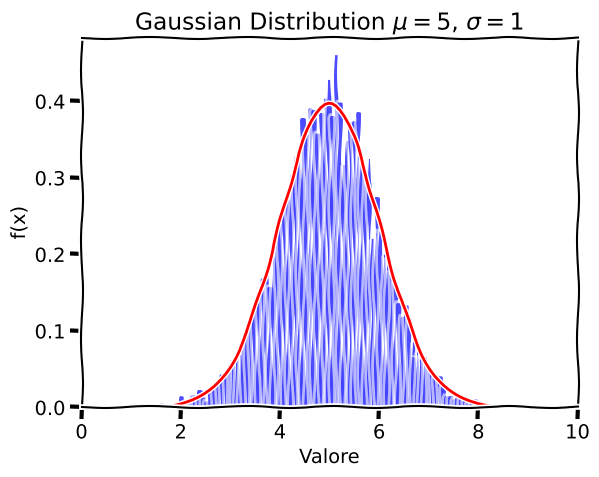

In [51]:
data = np.random.normal(mu, sigma, N)

# Imposta lo stile "comic"
plt.xkcd()

# Crea l'istogramma
count, b, ignored = plt.hist(data, bins=bins, density=dens, alpha=0.6, color='b')

# if fit:
# Sovrapponi la linea della distribuzione gaussiana
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, color='r')

bin_width = b[1] - b[0] 
# Titoli e etichette
title = f"Gaussian Distribution $\mu={mu}$, $\sigma={sigma}$"
plt.title(title)
plt.xlabel('Valore')

if norm:
    plt.ylabel('f(x)')
else:
    plt.ylabel('N(x)')

plt.xlim(0, 10)

# Mostra il grafico
plt.show()